In [1]:
import pandas as pd                #for handling datasets
import statsmodels.api as sm       #for statistical modeling
import pylab as pl                 #for plotting
import numpy as np                 #for numerical computation
pd.set_option('display.max_rows',None)

In [2]:
filename = "train_university_admission_data.csv"
names = ['admit','gre','gpa','prestige']
dfTrain = pd.read_csv(filename, names=names)
dfTest = pd.read_csv(filename, names=names)

In [3]:
dfTrain = pd.read_csv("train_university_admission_data.csv")
dfTest = pd.read_csv("test_university_admission_data.csv")

In [4]:
dfTrain.head()

,admit,gre,gpa,prestige
0,0,380,3.61,good
1,1,660,3.67,good
2,1,800,4.00,best
3,1,640,3.19,ok
4,0,520,2.93,ok


In [5]:
dfTrain.shape

(300, 4)

In [28]:
dfTrain

,admit,gre,gpa,prestige
0,0,380,3.61,good
1,1,660,3.67,good
2,1,800,4.00,best
3,1,640,3.19,ok
4,0,520,2.93,ok
5,1,760,3.00,veryGood
6,1,560,2.98,best
7,0,400,3.08,veryGood
8,1,540,3.39,good
9,0,700,3.92,veryGood


In [29]:
print(dfTrain.describe())

            admit         gre         gpa
count  300.000000  300.000000  300.000000
mean     0.306667  590.866667    3.386233
std      0.461880  117.717630    0.374880
min      0.000000  300.000000    2.260000
25%      0.000000  515.000000    3.130000
50%      0.000000  600.000000    3.390000
75%      1.000000  680.000000    3.642500
max      1.000000  800.000000    4.000000


In [30]:
dfTrain.corr()

,admit,gre,gpa
admit,1.000000,0.222689,0.199463
gre,0.222689,1.000000,0.377243
gpa,0.199463,0.377243,1.000000


In [6]:
dfTrain.groupby('admit').size()

admit
0    208
1     92
dtype: int64

In [32]:
dfTrain.groupby('prestige').size() # this indicates how many universities are there in each category

prestige
best         45
good         92
ok           56
veryGood    107
dtype: int64

In [33]:
dfTrain.groupby('admit').mean()

,gre,gpa
admit,,
0,573.461538,3.336587
1,630.217391,3.498478


In [34]:
dfTrain.groupby('prestige').mean()

,admit,gre,gpa
prestige,,,
best,0.555556,620.444444,3.480889
good,0.206522,579.130435,3.449457
ok,0.160714,573.571429,3.298571
veryGood,0.364486,597.570093,3.337944


In [35]:
dfTrain.groupby('prestige').mean()[['gre','gpa']]

,gre,gpa
prestige,,
best,620.444444,3.480889
good,579.130435,3.449457
ok,573.571429,3.298571
veryGood,597.570093,3.337944


In [36]:
print(pd.crosstab(dfTrain['admit'], dfTrain['prestige']))

prestige  best  good  ok  veryGood
admit                             
0           20    73  47        68
1           25    19   9        39


In [37]:
s=dfTrain.pivot_table('gpa', index='admit', columns='prestige')
s

prestige,best,good,ok,veryGood
admit,,,,
0,3.3005,3.420274,3.285319,3.292794
1,3.6252,3.561579,3.367778,3.416667


[]

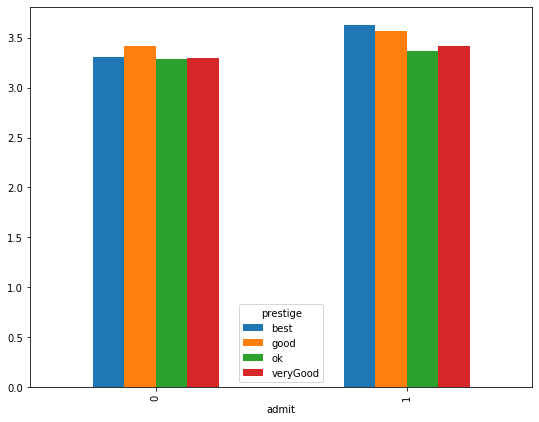

In [9]:
s=dfTrain.pivot_table('gpa', index='admit', columns='prestige').plot(kind='bar',figsize=(9,7))
s.plot()

In [17]:
dfTrain.pivot_table('gre', index='admit', columns='prestige')

prestige,best,good,ok,veryGood
admit,,,,
0,588.0,564.931507,567.234043,582.647059
1,646.4,633.684211,606.666667,623.589744


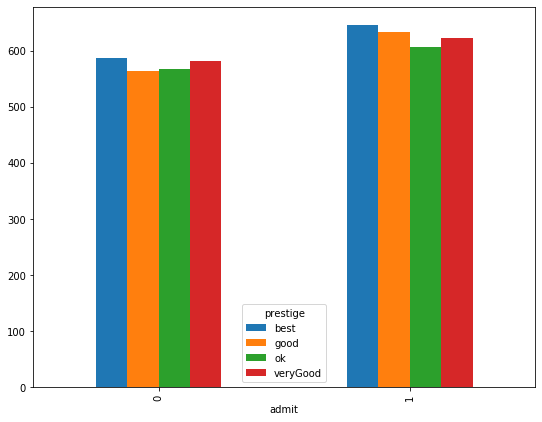

In [8]:
dfTrain.pivot_table('gre', index='admit', columns='prestige').plot(kind='bar',figsize=(9,7))

In [10]:
dfTrain.pivot_table('gre', index='prestige', columns='admit')

admit,0,1
prestige,,
best,588.000000,646.400000
good,564.931507,633.684211
ok,567.234043,606.666667
veryGood,582.647059,623.589744


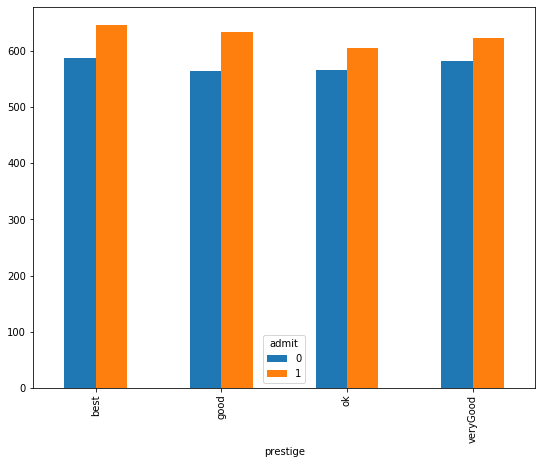

In [11]:
dfTrain.pivot_table('gre', index='prestige', columns='admit').plot(kind='bar',figsize=(9,7))

In [12]:
dfTrain.pivot_table('gpa', index='prestige', columns='admit')

admit,0,1
prestige,,
best,3.300500,3.625200
good,3.420274,3.561579
ok,3.285319,3.367778
veryGood,3.292794,3.416667


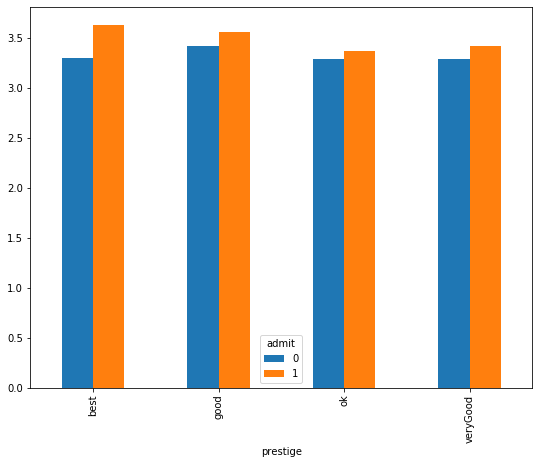

In [13]:
dfTrain.pivot_table('gpa', index='prestige', columns='admit').plot(kind='bar',figsize=(9,7))